# Project Case Scenario

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

# Overview of Project Tasks

Final Project: For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.

Task 4: Generate basic statistics and visualizations for upper management. 

Task 5: Use the appropriate tests to answer the questions provided.

Task 6: Share your Jupyter Notebook.

 This project is worth 15% of your final grade. Detailed instructions for each of these tasks follow.

# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Task 3: Load in the Dataset in your Jupyter Notebook

In [46]:
#Import analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm
#Reading the data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [2]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  histogram for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variab

In [3]:
#https://eu-de.dataplatform.cloud.ibm.com/analytics/notebooks/v2/bc13bf9b-4f66-456b-8f44-0cae77123201/view?access_token=f417725099cdd1c5f3075922cfaa5ed2e520aa4e822fa7cee6c60f61092fd8df

4.1 For the "Median value of owner-occupied homes" provide a boxplot

[Text(0.5, 0, 'MEDV - Median value of owner-occupied home'),
 Text(0, 0.5, 'x$1000')]

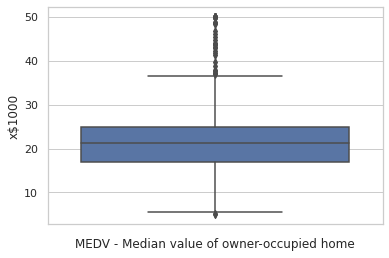

In [8]:
#MEDV - Median value of owner-occupied homes in $1000's

ax = sns.boxplot( y='MEDV', data=boston_df)
ax.set(xlabel='MEDV - Median value of owner-occupied home',ylabel= 'x$1000')


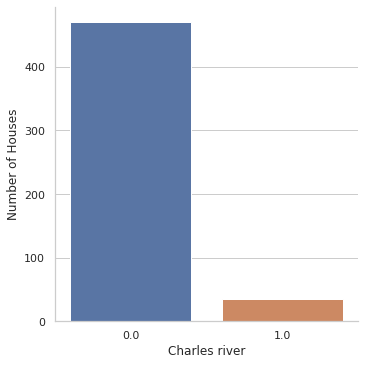

In [10]:
#Provide a histogram for the Charles river variable
ax=sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.set(xlabel='Charles river',ylabel= 'Number of Houses')

[Text(0.5, 0, 'Age Cathegory'), Text(0, 0.5, 'Number of houses')]

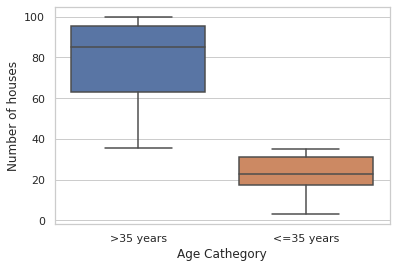

In [37]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[boston_df['AGE']<=35,'Age_Cat']='<=35 years'
boston_df.loc[boston_df['AGE']>35,'Age_Cat']='>35 years'
boston_df.head()
ax = sns.boxplot(x='Age_Cat', y='AGE', data=boston_df)
ax.set(xlabel='Age Cathegory',ylabel= 'Number of houses')


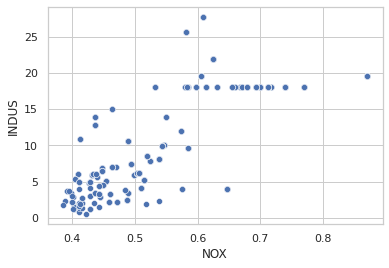

In [20]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

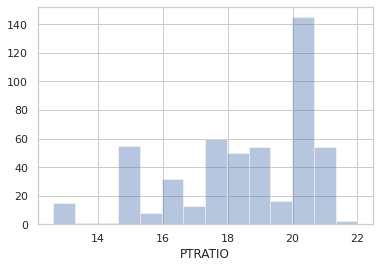

In [24]:
#Create a histogram for the pupil to teacher ratio variab
#ax=sns.catplot(x='PTRATIO', kind='count', data=boston_df)
ax.set(xlabel='Charles river',ylabel= 'Number of Houses')
ax = sns.distplot(boston_df['PTRATIO'], kde = False)

# Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

5.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

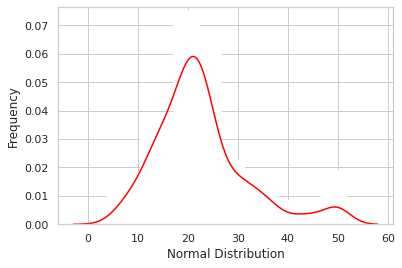

In [26]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

In [31]:
#We check equiality of variances
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

since the p-value is less than 0.05 we can assume not-equality of variance

In [33]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in housing value based on charles river

5.3 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

In [39]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#Test for equality of variance

scipy.stats.levene(boston_df[boston_df['Age_Cat'] == '<=35 years']['MEDV'],
                   boston_df[boston_df['Age_Cat'] == '>35 years']['MEDV'], 
                   center='mean')

LeveneResult(statistic=0.6585757883034907, pvalue=0.41744628021560803)

In [38]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Cat
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,>35 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,>35 years
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,>35 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,>35 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,>35 years


In [40]:
thirtyfive_lower = boston_df[boston_df['Age_Cat'] == '<=35 years']['MEDV']
thirtyfive_older =  boston_df[boston_df['Age_Cat'] == '>35 years']['MEDV']

In [41]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 38.75394252173375, P-Value: 1.0131428119243898e-09


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

5.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [49]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

Conclusion: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between beauty and teaching evaluation score.

5.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [47]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.21e-08
Time:                        18:37:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: p < 0.05 there is evidence of correlation between weighted distance to the five Boston employment centres on the median value of owner occupied homes